In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

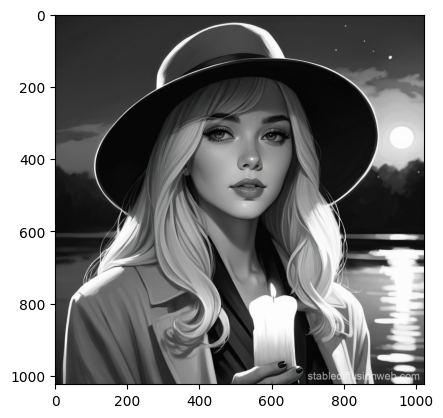

In [2]:
#TASK 1

# 1. read the image
image=cv2.imread('/content/LadyPic.jpg')
# 2. Display the image
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.show()


In [3]:
# 3. image size
print(image.shape)

(1024, 1024, 3)


In [4]:
# 4.image pixels
total_pixels=image.shape[0]*image.shape[1]
print(total_pixels)

1048576


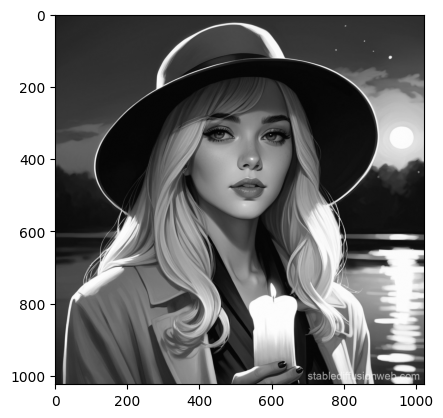

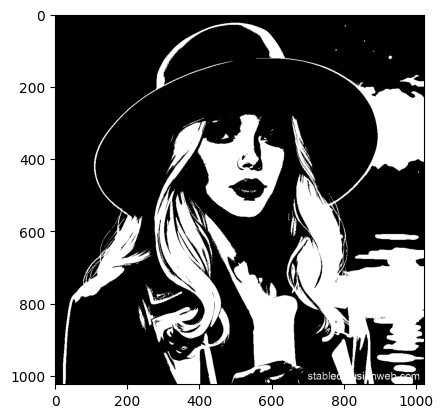

In [5]:
# 5. Convert RGB to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

# 6. Convert RGB to Grayscale and Binary Image using Threshold
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image, cmap='gray')
plt.show()


In [6]:
# i. Count the area of black pixels (value 0 in the binary image)
black_pixels = np.sum(binary_image == 0)  # Count number of black pixels (0 value in binary image)

# Get the size of the image
height, width = image.shape[:2]
image_size = height * width  # Total number of pixels in the image

# Print the results
print(f"Area of black pixels: {black_pixels}")
print(f"Total image size: {image_size}")

Area of black pixels: 752700
Total image size: 1048576


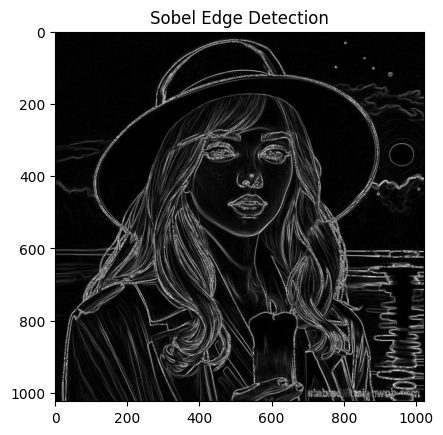

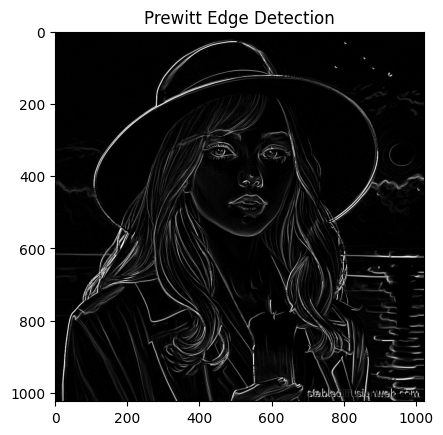

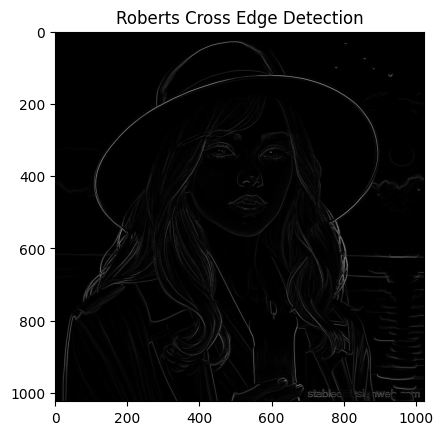

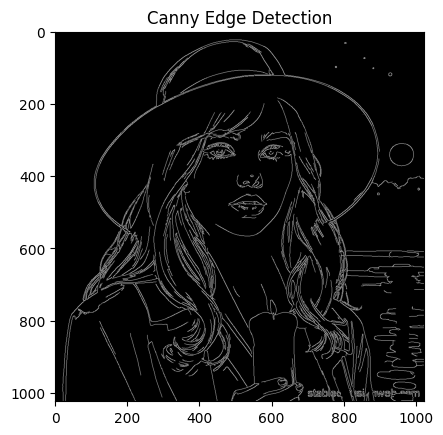

In [8]:
#TASK 2
import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('/content/LadyPic.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#SOBEL OPERATOR
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)
sobel = np.uint8(np.absolute(sobel))
plt.imshow(sobel, cmap='gray')
plt.title('Sobel Edge Detection')
plt.show()
#PREWITT OPERATOR
prewitt_kernelx = np.array([[ -1, 0, 1],
                            [ -1, 0, 1],
                            [ -1, 0, 1]])
prewitt_kernely = np.array([[ 1,  1,  1],
                            [ 0,  0,  0],
                            [-1, -1, -1]])
prewittx = cv2.filter2D(gray_image, -1, prewitt_kernelx)
prewitty = cv2.filter2D(gray_image, -1, prewitt_kernely)
prewitt = cv2.magnitude(prewittx.astype(np.float32), prewitty.astype(np.float32))
prewitt = np.uint8(prewitt)
plt.imshow(prewitt, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.show()

#ROBERTS CROSS OPERATOR
roberts_kernelx = np.array([[1, 0],
                            [0, -1]])
roberts_kernely = np.array([[0, 1],
                            [-1, 0]])
robertsx = cv2.filter2D(gray_image, -1, roberts_kernelx)
robertsy = cv2.filter2D(gray_image, -1, roberts_kernely)
roberts = cv2.magnitude(robertsx.astype(np.float32), robertsy.astype(np.float32))
roberts = np.uint8(roberts)
plt.imshow(roberts, cmap='gray')
plt.title('Roberts Cross Edge Detection')
plt.show()

#CANNY EDGE DETECTOR
canny = cv2.Canny(gray_image, 100, 200)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()


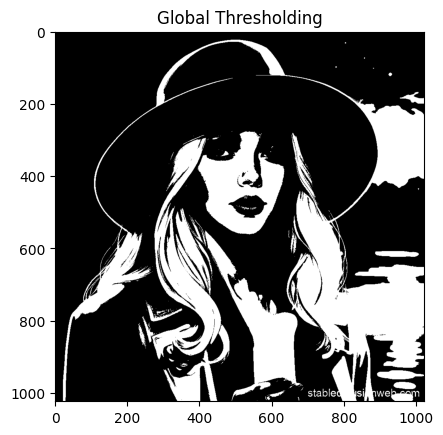

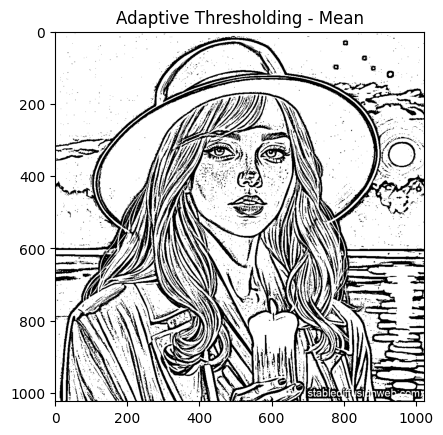

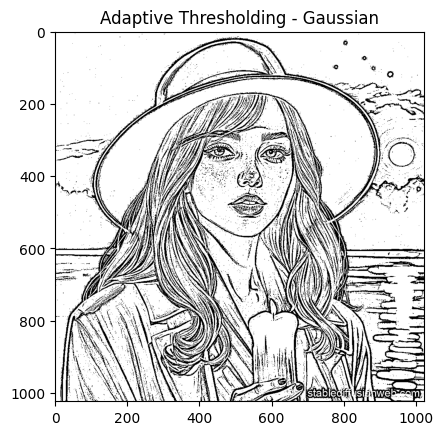

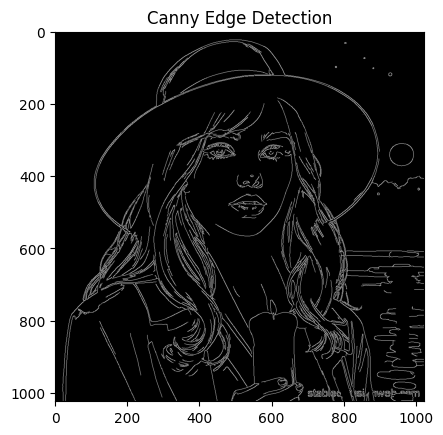

In [9]:
# Image segmentation

# i. Global Thresholding
_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding')
plt.show()

# ii. Adaptive Thresholding
adaptive_thresh_mean = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY, 11, 2)
adaptive_thresh_gaussian = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                               cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_thresh_mean, cmap='gray')
plt.title('Adaptive Thresholding - Mean')
plt.show()
plt.imshow(adaptive_thresh_gaussian, cmap='gray')
plt.title('Adaptive Thresholding - Gaussian')
plt.show()

#Edge Detection for Segmentation (Canny Edge Detection)
edges = cv2.Canny(gray_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()

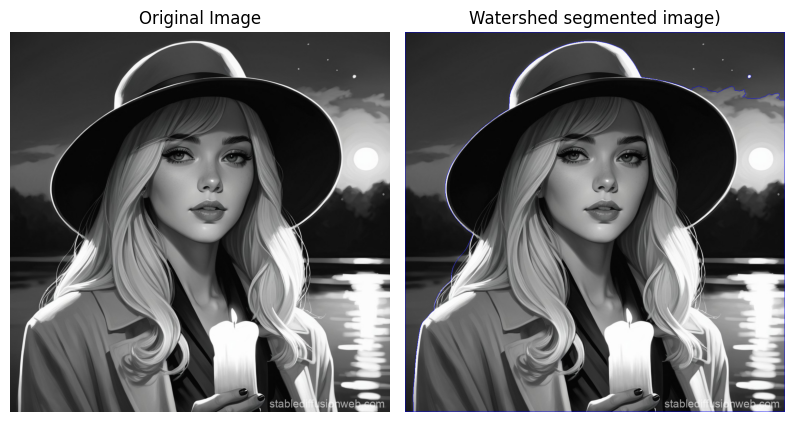

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/LadyPic.jpg')
original_image = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

sure_bg = cv2.dilate(opening, kernel, iterations=3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

plt.figure(figsize=(12, 10))
# Original Image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

#Segmented Image
plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Watershed segmented image)')
plt.axis('off')

plt.tight_layout()
plt.show()